In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
results = pd.read_csv('data/results.csv')
print(results.shape)
results.head()

(506, 13)


,avg_win,discard_strategy,draw_strategy,elapsed_seconds,knock_strategy,notes,player_number,rounds,seed,sim_id,start_time,var_win,wins
0,1.80,Discard Highest Useless,Pile if Completes,7.052077,Knock at 50,TESTING,0.0,10.0,11.0,1.0,2020-06-28 13:53:27,16.166632,4.0
1,-1.80,Discard Highest Useless,Pile if Completes,7.052077,Knock at 13,TESTING,1.0,10.0,11.0,1.0,2020-06-28 13:53:27,16.166632,6.0
2,-6.32,Discard Highest Useless,Pile if Completes,18.185480,Knock at 50,TESTING,0.0,25.0,13.0,2.0,2020-06-28 13:54:00,13.947674,10.0
3,6.32,Discard Highest Useless,Pile if Completes,18.185480,Knock at 13,TESTING,1.0,25.0,13.0,2.0,2020-06-28 13:54:00,13.947674,15.0
4,-4.04,Discard Highest Useless,Pile if Completes,85.766441,Do not Knock,TESTING,0.0,25.0,13.0,3.0,2020-06-28 13:55:35,10.978087,10.0


# removing test data

In [3]:
results = results[~results['notes'].isin(['TESTING', 'TESTING DAN RUN'])]
print(len(results))
results.head(2)

416


,avg_win,discard_strategy,draw_strategy,elapsed_seconds,knock_strategy,notes,player_number,rounds,seed,sim_id,start_time,var_win,wins
64,-0.59,Discard Highest Useless,Pile if Completes,665.674302,Knock at 0,Looking for best strategy against an opponent ...,0.0,100.0,0.0,33.0,2020-06-28 15:21:39,74.0619,35.0
65,0.59,Discard Highest Useless,Pile if Completes,665.674302,Knock at 0,Looking for best strategy against an opponent ...,1.0,100.0,0.0,33.0,2020-06-28 15:21:39,74.0619,45.0


In [4]:
grouped_results = results.groupby(['sim_id', 'knock_strategy', 'draw_strategy', 'discard_strategy', 'rounds', 'notes']).agg(
    {'avg_win': [max, 'size']}).reset_index() \
                .sort_values(['sim_id','knock_strategy'])#[('avg_win', 'size')].value_counts()

grouped_results.iloc[30:90]

sim_id knock_strategy                                  draw_strategy  \
                                                                          
30   62.0     Knock at 0  Half Length Near Runs and Sets Draw From Pile   
31   62.0    Knock at 15  Half Length Near Runs and Sets Draw From Pile   
32   63.0     Knock at 0  Half Length Near Runs and Sets Draw From Pile   
33   63.0    Knock at 20  Half Length Near Runs and Sets Draw From Pile   
34   64.0     Knock at 0  Half Length Near Runs and Sets Draw From Pile   
35   64.0    Knock at 25  Half Length Near Runs and Sets Draw From Pile   
36   65.0     Knock at 0  Half Length Near Runs and Sets Draw From Pile   
37   65.0    Knock at 30  Half Length Near Runs and Sets Draw From Pile   
38   66.0     Knock at 0  Half Length Near Runs and Sets Draw From Pile   
39   66.0    Knock at 35  Half Length Near Runs and Sets Draw From Pile   
40   67.0     Knock at 0  Half Length Near Runs and Sets Draw From Pile   
41   67.0    Knock at 40  Half Length Near Runs and Sets Draw From Pile   
42   68.0     Knock at 0  Half Length Near Runs and Sets Draw From Pile   
43   68.0    Knock at 45  Half Length Near Runs and Sets Draw From Pile   
44   69.0     Knock at 0  Half Length Near Runs and Sets Draw From Pile   
45   69.0    Knock at 50  Half Length Near Runs and Sets Draw From Pile   
46   70.0     Knock at 0  Half Length Near Runs and Sets Draw From Pile   
47   70.0    Knock at 55  Half Length Near Runs and Sets Draw From Pile   
48   71.0     Knock at 0  Half Length Near Runs and Sets Draw From Pile   
49   71.0    Knock at 60  Half Length Near Runs and Sets Draw From Pile   
50   72.0     Knock at 0  Half Length Near Runs and Sets Draw From Pile   
51   72.0     Knock at 0                              Pile if Completes   
52   73.0     Knock at 5  Half Length Near Runs and Sets Draw From Pile   
53   73.0     Knock at 5                              Pile if Completes   
54   74.0    Knock at 10  Half Length Near Runs and Sets Draw From Pile   
55   74.0    Knock at 10                              Pile if Completes   
56   75.0    Knock at 15  Half Length Near Runs and Sets Draw From Pile   
57   75.0    Knock at 15                              Pile if Completes   
58   76.0    Knock at 20  Half Length Near Runs and Sets Draw From Pile   
59   76.0    Knock at 20                              Pile if Completes   
60   77.0    Knock at 25  Half Length Near Runs and Sets Draw From Pile   
61   77.0    Knock at 25                              Pile if Completes   
62   78.0    Knock at 30  Half Length Near Runs and Sets Draw From Pile   
63   78.0    Knock at 30                              Pile if Completes   
64   79.0    Knock at 35  Half Length Near Runs and Sets Draw From Pile   
65   79.0    Knock at 35                              Pile if Completes   
66   80.0    Knock at 40  Half Length Near Runs and Sets Draw From Pile   
67   80.0    Knock at 40                              Pile if Completes   
68   81.0    Knock at 45  Half Length Near Runs and Sets Draw From Pile   
69   81.0    Knock at 45                              Pile if Completes   
70   82.0    Knock at 50  Half Length Near Runs and Sets Draw From Pile   
71   82.0    Knock at 50                              Pile if Completes   
72   83.0    Knock at 55  Half Length Near Runs and Sets Draw From Pile   
73   83.0    Knock at 55                              Pile if Completes   
74   84.0    Knock at 60  Half Length Near Runs and Sets Draw From Pile   
75   84.0    Knock at 60                              Pile if Completes   
76   85.0     Knock at 5                              Pile if Completes   
77   86.0    Knock at 10                              Pile if Completes   
78   86.0     Knock at 5                              Pile if Completes   
79   87.0    Knock at 15                              Pile if Completes   
80   87.0     Knock at 5                              Pile if Completes   
81   88.0    Knock at 20    

In [5]:
aggressive_vs_conservative = results[results['notes'] == ('''Testing the more conservative pile and discard strategy \
vs the more aggressive near runs/sets pile and discard strategy. Knock values will be same for both players''')]

print(len(aggressive_vs_conservative))
aggressive_vs_conservative.head()

26


,avg_win,discard_strategy,draw_strategy,elapsed_seconds,knock_strategy,notes,player_number,rounds,seed,sim_id,start_time,var_win,wins
142,10.32,Discard Highest Useless,Pile if Completes,724.977120,Knock at 0,Testing the more conservative pile and discard...,0.0,100.0,10000.0,72.0,2020-06-28 23:34:19,492.4176,55.0
143,-10.32,Discard Highest Non-Near Runs and Sets,Half Length Near Runs and Sets Draw From Pile,724.977120,Knock at 0,Testing the more conservative pile and discard...,1.0,100.0,10000.0,72.0,2020-06-28 23:34:19,492.4176,39.0
144,16.78,Discard Highest Useless,Pile if Completes,603.434532,Knock at 5,Testing the more conservative pile and discard...,0.0,100.0,10001.0,73.0,2020-06-28 23:46:24,408.5516,72.0
145,-16.78,Discard Highest Non-Near Runs and Sets,Half Length Near Runs and Sets Draw From Pile,603.434532,Knock at 5,Testing the more conservative pile and discard...,1.0,100.0,10001.0,73.0,2020-06-28 23:46:24,408.5516,23.0
146,22.41,Discard Highest Useless,Pile if Completes,356.403518,Knock at 10,Testing the more conservative pile and discard...,0.0,100.0,10002.0,74.0,2020-06-28 23:56:28,507.7219,85.0


# graphing conservative vs aggressive round gain -- knocks at same value

Text(0.5, 1.0, 'Average Win of Conservative Strategy vs. Aggressive Strategy (100 rounds)')

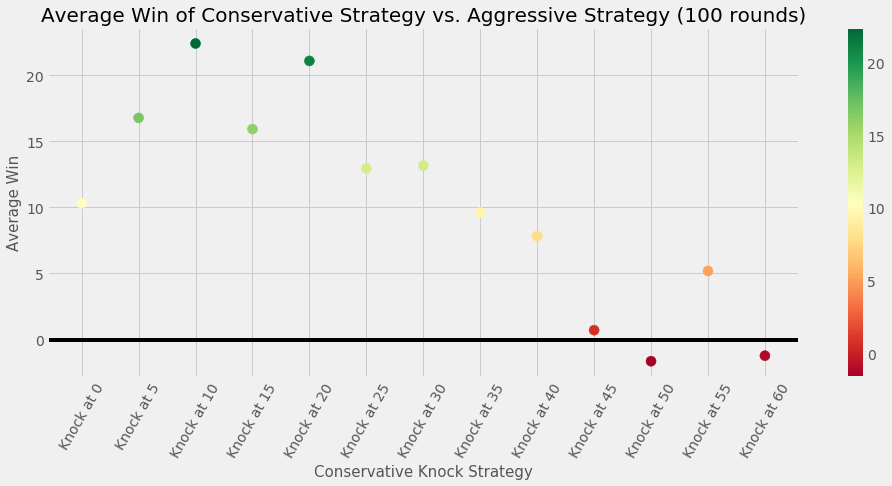

In [31]:
conservative_perspective = aggressive_vs_conservative[aggressive_vs_conservative['player_number'] == 0]

cm = plt.cm.get_cmap('RdYlGn')
plt.style.use('fivethirtyeight')
plt.subplots(figsize = (15, 6))


a = plt.scatter(x = conservative_perspective['knock_strategy'], y = conservative_perspective['avg_win'], 
           c = conservative_perspective['avg_win'], s=100, cmap = cm)
plt.axhline(y=0, color = 'black')
plt.colorbar(a)

plt.xticks(rotation = 60)

plt.xlabel('Conservative Knock Strategy', fontsize = 15)
plt.ylabel('Average Win', fontsize = 15)
plt.title('Average Win of Conservative Strategy vs. Aggressive Strategy (100 rounds)', fontsize = 20)

# key observations:

1. When testing the conservative strategy against the 0 knock strategy, the conservative strategy tends to have an average win per round of 2.5 when it knocks between 10 and 25. However, it loses when knocking at a value of >= 40.

2. When running the entire grid search of consertive knock strategy against conservative knock strategy, knocking at between 20 and 30 produces the best results, and 25 is clearly the best in that group. Knocking at 25 has close average rounds with opponents knocking in the 25-35 range, and dominates elsewhere.
    - We are running more simulations in the 10-40 range to make certain the best score to knock at

3. When running the conservative strategy against the aggressive strategy, and keeping the same knock strategies for both (i.e. 0 vs 0, 5 vs 5, ...., 60 vs 60), The conservative strategy tends to win for knock values between 0 and 40, and it's close to even between 45 and 60. This tells us that the conservative strategy (especially when knocking in the 20-30 range), is much better than the aggressive strategy.

## Analyses/work left to do:

4. Mix and match the conservative strategy vs the aggressive knock strategy, test the following:
    - constant knock, conservative discard, aggressive draw vs constant knock, conservative discard, conservative draw
    - constant knock, aggressive discard, conservative draw vs constant knock, conservative discard, conservative draw
    
    The goal here is to figure out if a mix and match of conservative and aggressive strategies can take down just the conseravtive strategy alone
    
5. See if a dynamic knock strategy makes a difference:
    - First, learn how many points each strategy has on each turn on average (i.e. conservative strategy might have 50 points on turn 1, 40 points on turn 2, 35 points on turn 3, etc.., aggressive knock strategy might have 50 points on turn 1, 38 points on turn 2, 35 points on turn 3, and a mix strategy might have something else..)
    - Use the best strategy we found (either conservative, aggressive, or mix), and add a rule for dynamic knocking, such that if you have less than the value expected for that turn, you knock
    - Bonus: Learn how many points are "lost/gained" after you knock (i.e. how many points on average does your opponent gain after you knock).
    
    
6. Write final analysis. Detailed outline below:
    1. The goal was to find the best strategy out of a few we created
    2. We first learned that never knocking will lose against patient players that wait to knock ~10-25 points assuming both follow conservative drawing and discarding strategies
    3. We then ran a full grid search, varying the knock values but keeping the rest of the conservative strategy consistent between the two players. We learned that knocking in the range of 20-30 does well against most other knock values, and in particular, 25 seems to have the best overall results.
    4. We then tested the aggressive strategy against the conservative strategy. We kept the knock values the same for both strategies, but one player had the aggressive discard and draw strategies while the other player had the conservative counterparts. We learned that when both players have the same knock value, the conservative strategy beats the aggressive strategy at all reasonable knock values (i.e 0-40). It's a toss-up after 40 because there just aren't that many rounds to let the strategies take their course.
        - We may follow up here with the aggressive strategies having a different cutoff in the actions (i.e. right now they do things for only half the deck, and we may vary that parameter to a quarter of the deck and three quarters of the deck) to see if it has any impact against its conservative counterparts.
    5. We then tested a mix and match approach. We again kept the two players at the same knock values, but borrowed one strategy from the aggressive strategy and one from the conservative strategy to test against a full conservative strategy. The results are tbd..
    6. Now that we know which one of our strategies (conservative, aggressive, mixed) does the best, we wanted to test one more change which is to vary the knock value to be dynamic within the game. We studied the relationship between what turn it is in the game and what score our best strategy would have on that turn, and we divised a knock strategy that would always knock if it had less than that value on that turn. We then ran a final test of our best strategy with the dynamic knock strategy vs the original best strategy with constant knock strategy. Results are tbd...




In [63]:
results['notes'].unique()

array(['Looking for best strategy against an opponent who knocks only at 0',
       "Finding best strategy against an opponent that never knocks (unless perfect score), with 'near run/sets' drawing and discarding strategies",
       'Testing the more conservative pile and discard strategy vs the more aggressive near runs/sets pile and discard strategy. Knock values will be same for both players',
       'Completing the grid search on constant knock strategies.'],
      dtype=object)

In [24]:
grouped_results.columns.values

array([('sim_id', ''), ('knock_strategy', ''), ('draw_strategy', ''),
       ('discard_strategy', ''), ('avg_win', 'max'), ('avg_win', 'size')],
      dtype=object)

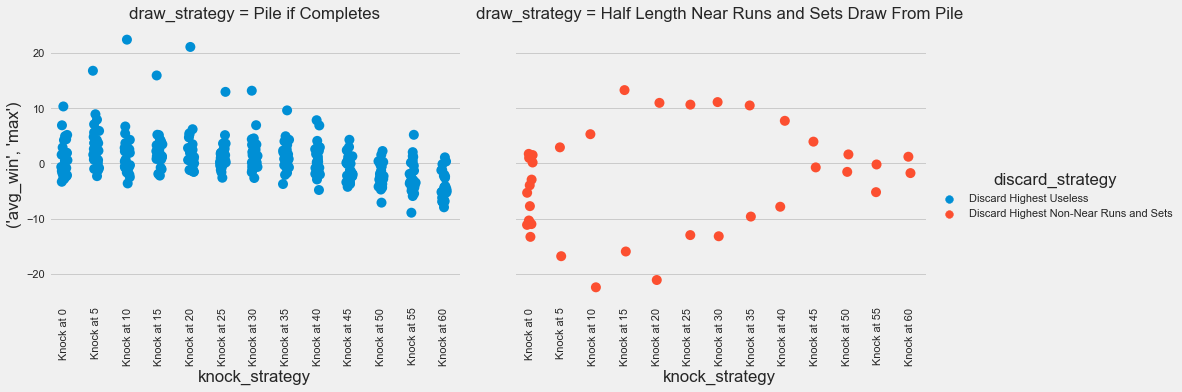

In [52]:
# sns.set(rc={'figure.figsize':(10,25)})

plt.style.use('fivethirtyeight')
g = sns.catplot(x = 'knock_strategy', y = ('avg_win', 'max'), data = grouped_results, hue = 'discard_strategy', aspect=20/15, 
           s = 10, col = 'draw_strategy', edgecolor = 'black')

g.set_xticklabels(rotation = 90)

# getting the various matchups


First, split data into perspective of both players competing 

In [14]:
results_0 = results[results['player_number'] == 0]
results_1 = results[results['player_number'] == 1]

assert len(results_0) + len(results_1) == len(results)

We want to make a grid plot for each combination of matchups. We have:

1. Constant Knock Strategy, Pile if Completes, Discard Highest Useless vs itself. Note, the knock value changes and there's a grid search there.
2. Constant Knock Strategy, Pile if Completes, Discard Highest Useless vs Constant Knock Strategy, Pile if 2/3s of run/set, 

In [17]:
results_merged = results_0.merge(results_1[['discard_strategy', 'draw_strategy', 'knock_strategy', 
                                            'sim_id', 'player_number', 'avg_win']], how = 'left', on = 'sim_id')
results_merged.head()

,avg_win_x,discard_strategy_x,draw_strategy_x,elapsed_seconds,knock_strategy_x,notes,player_number_x,rounds,seed,sim_id,start_time,var_win,wins,discard_strategy_y,draw_strategy_y,knock_strategy_y,player_number_y,avg_win_y
0,-0.59,Discard Highest Useless,Pile if Completes,665.674302,Knock at 0,Looking for best strategy against an opponent ...,0.0,100.0,0.0,33.0,2020-06-28 15:21:39,74.0619,35.0,Discard Highest Useless,Pile if Completes,Knock at 0,1.0,0.59
1,-0.62,Discard Highest Useless,Pile if Completes,489.971976,Knock at 0,Looking for best strategy against an opponent ...,0.0,100.0,1.0,34.0,2020-06-28 15:32:45,97.9756,43.0,Discard Highest Useless,Pile if Completes,Knock at 5,1.0,0.62
2,-2.56,Discard Highest Useless,Pile if Completes,377.061190,Knock at 0,Looking for best strategy against an opponent ...,0.0,100.0,2.0,35.0,2020-06-28 15:40:55,114.6064,34.0,Discard Highest Useless,Pile if Completes,Knock at 10,1.0,2.56
3,-3.31,Discard Highest Useless,Pile if Completes,295.712303,Knock at 0,Looking for best strategy against an opponent ...,0.0,100.0,3.0,36.0,2020-06-28 15:47:12,140.8339,40.0,Discard Highest Useless,Pile if Completes,Knock at 15,1.0,3.31
4,-2.12,Discard Highest Useless,Pile if Completes,255.138871,Knock at 0,Looking for best strategy against an opponent ...,0.0,100.0,4.0,37.0,2020-06-28 15:52:08,196.1056,51.0,Discard Highest Useless,Pile if Completes,Knock at 20,1.0,2.12


# to plot a heatmap, we need a pivot table with the form:

1. Varying parameter on the X
2. Same Varying parameter on the Y
3. Average win as the value

# let's start with:

Constant Knock Strategy (as varying parameter), discard highest useless, and draw if completes vs itself

In [18]:
result_subset_0 = results_merged[(results_merged['discard_strategy_x'] == 'Discard Highest Useless') &
                              (results_merged['draw_strategy_x'] == 'Pile if Completes') &
                                (results_merged['discard_strategy_y'] == 'Discard Highest Useless') &
                              (results_merged['draw_strategy_y'] == 'Pile if Completes')]

print(len(result_subset_0))
result_subset_0.head()

182


,avg_win_x,discard_strategy_x,draw_strategy_x,elapsed_seconds,knock_strategy_x,notes,player_number_x,rounds,seed,sim_id,start_time,var_win,wins,discard_strategy_y,draw_strategy_y,knock_strategy_y,player_number_y,avg_win_y
0,-0.59,Discard Highest Useless,Pile if Completes,665.674302,Knock at 0,Looking for best strategy against an opponent ...,0.0,100.0,0.0,33.0,2020-06-28 15:21:39,74.0619,35.0,Discard Highest Useless,Pile if Completes,Knock at 0,1.0,0.59
1,-0.62,Discard Highest Useless,Pile if Completes,489.971976,Knock at 0,Looking for best strategy against an opponent ...,0.0,100.0,1.0,34.0,2020-06-28 15:32:45,97.9756,43.0,Discard Highest Useless,Pile if Completes,Knock at 5,1.0,0.62
2,-2.56,Discard Highest Useless,Pile if Completes,377.061190,Knock at 0,Looking for best strategy against an opponent ...,0.0,100.0,2.0,35.0,2020-06-28 15:40:55,114.6064,34.0,Discard Highest Useless,Pile if Completes,Knock at 10,1.0,2.56
3,-3.31,Discard Highest Useless,Pile if Completes,295.712303,Knock at 0,Looking for best strategy against an opponent ...,0.0,100.0,3.0,36.0,2020-06-28 15:47:12,140.8339,40.0,Discard Highest Useless,Pile if Completes,Knock at 15,1.0,3.31
4,-2.12,Discard Highest Useless,Pile if Completes,255.138871,Knock at 0,Looking for best strategy against an opponent ...,0.0,100.0,4.0,37.0,2020-06-28 15:52:08,196.1056,51.0,Discard Highest Useless,Pile if Completes,Knock at 20,1.0,2.12


In [29]:
result_subset_0['notes'].value_counts()

Completing the grid search on constant knock strategies.              169
Looking for best strategy against an opponent who knocks only at 0     13
Name: notes, dtype: int64

In [19]:
completing_grid = result_subset_0[result_subset_0['notes'] == 'Completing the grid search on constant knock strategies.']
completing_grid.head()

,avg_win_x,discard_strategy_x,draw_strategy_x,elapsed_seconds,knock_strategy_x,notes,player_number_x,rounds,seed,sim_id,start_time,var_win,wins,discard_strategy_y,draw_strategy_y,knock_strategy_y,player_number_y,avg_win_y
39,0.83,Discard Highest Useless,Pile if Completes,313.018631,Knock at 5,Completing the grid search on constant knock s...,0.0,100.0,1313.0,85.0,2020-06-29 17:44:17,160.1811,48.0,Discard Highest Useless,Pile if Completes,Knock at 5,1.0,-0.83
40,0.53,Discard Highest Useless,Pile if Completes,285.743138,Knock at 5,Completing the grid search on constant knock s...,0.0,100.0,1313.0,86.0,2020-06-29 17:49:30,170.5691,51.0,Discard Highest Useless,Pile if Completes,Knock at 10,1.0,-0.53
41,-0.81,Discard Highest Useless,Pile if Completes,231.472837,Knock at 5,Completing the grid search on constant knock s...,0.0,100.0,1313.0,87.0,2020-06-29 17:54:16,190.3339,48.0,Discard Highest Useless,Pile if Completes,Knock at 15,1.0,0.81
42,0.71,Discard Highest Useless,Pile if Completes,212.049984,Knock at 5,Completing the grid search on constant knock s...,0.0,100.0,1313.0,88.0,2020-06-29 17:58:07,215.3459,60.0,Discard Highest Useless,Pile if Completes,Knock at 20,1.0,-0.71
43,1.59,Discard Highest Useless,Pile if Completes,179.871922,Knock at 5,Completing the grid search on constant knock s...,0.0,100.0,1313.0,89.0,2020-06-29 18:01:40,211.1219,56.0,Discard Highest Useless,Pile if Completes,Knock at 25,1.0,-1.59


In [21]:
completed_grid_pivoted = pd.pivot_table(completing_grid, index = 'knock_strategy_x', columns = 'knock_strategy_y', values = 'avg_win_x')
completed_grid_pivoted

knock_strategy_y,Knock at 0,Knock at 10,Knock at 15,Knock at 20,Knock at 25,Knock at 30,Knock at 35,Knock at 40,Knock at 45,Knock at 5,Knock at 50,Knock at 55,Knock at 60
knock_strategy_x,,,,,,,,,,,,,
Knock at 0,0.483333,-2.830,-2.633333,-1.916667,-2.740000,-1.376667,-0.820000,1.906667,1.763333,-2.310000,2.896667,4.380000,5.166667
Knock at 10,NaN,0.425,-1.191667,-1.550000,-1.958333,-1.568333,-0.061667,0.606667,2.046667,NaN,3.305000,3.981667,6.063333
Knock at 15,NaN,NaN,0.680000,-0.401667,-0.073333,-0.451667,0.660000,1.855000,2.758333,NaN,3.830000,4.171667,5.168333
Knock at 20,NaN,NaN,NaN,-0.725000,-1.501667,-0.243333,-0.371667,0.733333,0.693333,NaN,3.760000,4.463333,5.723333
Knock at 25,NaN,NaN,NaN,NaN,0.738333,0.138333,-0.065000,-0.351667,0.391667,NaN,1.533333,2.748333,3.865000
Knock at 30,NaN,NaN,NaN,NaN,NaN,0.076667,-0.201667,0.646667,2.756667,NaN,3.463333,3.495000,5.733333
Knock at 35,NaN,NaN,NaN,NaN,NaN,NaN,0.278333,0.145000,1.006667,NaN,2.190000,3.688333,4.608333
Knock at 40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256667,0.651667,NaN,2.605000,2.686667,5.485000
Knock at 45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.225000,NaN,1.298333,2.143333,3.333333


In [22]:
completed_grid_pivoted = completed_grid_pivoted.reindex(['Knock at 0', 'Knock at 5', 'Knock at 10', 'Knock at 15', 'Knock at 20', 'Knock at 25',
                               'Knock at 30', 'Knock at 35', 'Knock at 40', 'Knock at 45', 'Knock at 50', 'Knock at 55',
                               'Knock at 60'])
completed_grid_pivoted = completed_grid_pivoted[['Knock at 0', 'Knock at 5', 'Knock at 10', 'Knock at 15', 'Knock at 20', 'Knock at 25',
                               'Knock at 30', 'Knock at 35', 'Knock at 40', 'Knock at 45', 'Knock at 50', 'Knock at 55',
                               'Knock at 60']]
completed_grid_pivoted

knock_strategy_y,Knock at 0,Knock at 5,Knock at 10,Knock at 15,Knock at 20,Knock at 25,Knock at 30,Knock at 35,Knock at 40,Knock at 45,Knock at 50,Knock at 55,Knock at 60
knock_strategy_x,,,,,,,,,,,,,
Knock at 0,0.483333,-2.310000,-2.830,-2.633333,-1.916667,-2.740000,-1.376667,-0.820000,1.906667,1.763333,2.896667,4.380000,5.166667
Knock at 5,NaN,0.456667,-0.880,-1.055000,-0.228333,0.303333,1.781667,2.310000,3.391667,3.683333,5.665000,7.401667,6.771667
Knock at 10,NaN,NaN,0.425,-1.191667,-1.550000,-1.958333,-1.568333,-0.061667,0.606667,2.046667,3.305000,3.981667,6.063333
Knock at 15,NaN,NaN,NaN,0.680000,-0.401667,-0.073333,-0.451667,0.660000,1.855000,2.758333,3.830000,4.171667,5.168333
Knock at 20,NaN,NaN,NaN,NaN,-0.725000,-1.501667,-0.243333,-0.371667,0.733333,0.693333,3.760000,4.463333,5.723333
Knock at 25,NaN,NaN,NaN,NaN,NaN,0.738333,0.138333,-0.065000,-0.351667,0.391667,1.533333,2.748333,3.865000
Knock at 30,NaN,NaN,NaN,NaN,NaN,NaN,0.076667,-0.201667,0.646667,2.756667,3.463333,3.495000,5.733333
Knock at 35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.278333,0.145000,1.006667,2.190000,3.688333,4.608333
Knock at 40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256667,0.651667,2.605000,2.686667,5.485000


In [24]:
completed_grid_pivoted_2 = pd.pivot_table(completing_grid, index = 'knock_strategy_y', columns = 'knock_strategy_x', values = 'avg_win_y')
completed_grid_pivoted_2 = completed_grid_pivoted_2.reindex(['Knock at 0', 'Knock at 5', 'Knock at 10', 'Knock at 15', 'Knock at 20', 'Knock at 25',
                               'Knock at 30', 'Knock at 35', 'Knock at 40', 'Knock at 45', 'Knock at 50', 'Knock at 55',
                               'Knock at 60'])
completed_grid_pivoted_2 = completed_grid_pivoted_2[['Knock at 0', 'Knock at 5', 'Knock at 10', 'Knock at 15', 'Knock at 20', 'Knock at 25',
                               'Knock at 30', 'Knock at 35', 'Knock at 40', 'Knock at 45', 'Knock at 50', 'Knock at 55',
                               'Knock at 60']]
completed_grid_pivoted_2

knock_strategy_x,Knock at 0,Knock at 5,Knock at 10,Knock at 15,Knock at 20,Knock at 25,Knock at 30,Knock at 35,Knock at 40,Knock at 45,Knock at 50,Knock at 55,Knock at 60
knock_strategy_y,,,,,,,,,,,,,
Knock at 0,-0.483333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Knock at 5,2.310000,-0.456667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Knock at 10,2.830000,0.880000,-0.425000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Knock at 15,2.633333,1.055000,1.191667,-0.680000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Knock at 20,1.916667,0.228333,1.550000,0.401667,0.725000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Knock at 25,2.740000,-0.303333,1.958333,0.073333,1.501667,-0.738333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Knock at 30,1.376667,-1.781667,1.568333,0.451667,0.243333,-0.138333,-0.076667,NaN,NaN,NaN,NaN,NaN,NaN
Knock at 35,0.820000,-2.310000,0.061667,-0.660000,0.371667,0.065000,0.201667,-0.278333,NaN,NaN,NaN,NaN,NaN
Knock at 40,-1.906667,-3.391667,-0.606667,-1.855000,-0.733333,0.351667,-0.646667,-0.145000,-0.256667,NaN,NaN,NaN,NaN


In [26]:
completing_grid

,avg_win_x,discard_strategy_x,draw_strategy_x,elapsed_seconds,knock_strategy_x,notes,player_number_x,rounds,seed,sim_id,start_time,var_win,wins,discard_strategy_y,draw_strategy_y,knock_strategy_y,player_number_y,avg_win_y
39,0.830000,Discard Highest Useless,Pile if Completes,313.018631,Knock at 5,Completing the grid search on constant knock s...,0.0,100.0,1313.0,85.0,2020-06-29 17:44:17,160.181100,48.0,Discard Highest Useless,Pile if Completes,Knock at 5,1.0,-0.830000
40,0.530000,Discard Highest Useless,Pile if Completes,285.743138,Knock at 5,Completing the grid search on constant knock s...,0.0,100.0,1313.0,86.0,2020-06-29 17:49:30,170.569100,51.0,Discard Highest Useless,Pile if Completes,Knock at 10,1.0,-0.530000
41,-0.810000,Discard Highest Useless,Pile if Completes,231.472837,Knock at 5,Completing the grid search on constant knock s...,0.0,100.0,1313.0,87.0,2020-06-29 17:54:16,190.333900,48.0,Discard Highest Useless,Pile if Completes,Knock at 15,1.0,0.810000
42,0.710000,Discard Highest Useless,Pile if Completes,212.049984,Knock at 5,Completing the grid search on constant knock s...,0.0,100.0,1313.0,88.0,2020-06-29 17:58:07,215.345900,60.0,Discard Highest Useless,Pile if Completes,Knock at 20,1.0,-0.710000
43,1.590000,Discard Highest Useless,Pile if Completes,179.871922,Knock at 5,Completing the grid search on constant knock s...,0.0,100.0,1313.0,89.0,2020-06-29 18:01:40,211.121900,56.0,Discard Highest Useless,Pile if Completes,Knock at 25,1.0,-1.590000
44,2.630000,Discard Highest Useless,Pile if Completes,158.134160,Knock at 5,Completing the grid search on constant knock s...,0.0,100.0,1313.0,90.0,2020-06-29 18:04:39,262.733100,60.0,Discard Highest Useless,Pile if Completes,Knock at 30,1.0,-2.630000
45,3.720000,Discard Highest Useless,Pile if Completes,130.760639,Knock at 5,Completing the grid search on constant knock s...,0.0,100.0,1313.0,91.0,2020-06-29 18:07:18,293.121600,59.0,Discard Highest Useless,Pile if Completes,Knock at 35,1.0,-3.720000
46,4.800000,Discard Highest Useless,Pile if Completes,104.372032,Knock at 5,Completing the grid search on constant knock s...,0.0,100.0,1313.0,92.0,2020-06-29 18:09:28,317.580000,59.0,Discard Highest Useless,Pile if Completes,Knock at 40,1.0,-4.800000
47,3.680000,Discard Highest Useless,Pile if Completes,90.470733,Knock at 5,Completing the grid search on constant knock s...,0.0,100.0,1313.0,93.0,2020-06-29 18:11:13,323.077600,55.0,Discard Highest Useless,Pile if Completes,Knock at 45,1.0,-3.680000
48,7.090000,Discard Highest Useless,Pile if Completes,67.354680,Knock at 5,Completing the grid search on constant knock s...,0.0,100.0,1313.0,94.0,2020-06-29 18:12:43,372.261900,62.0,Discard Highest Useless,Pile if Completes,Knock at 50,1.0,-7.090000


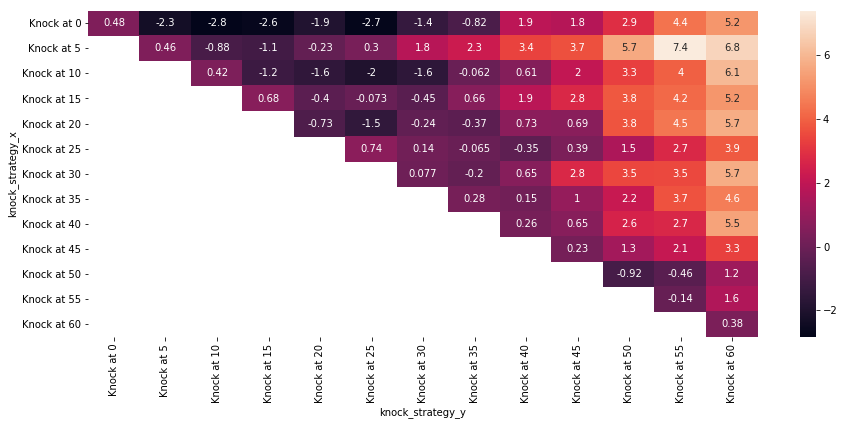

In [48]:
plt.subplots(figsize = (15, 6))
sns.heatmap(completed_grid_pivoted, annot=True)

In [32]:
turn_dict = {'round': [1,2,3,4,5], 
 'player1': [[60, 55, 50, 45], [44, 42, 41, 34, 35, 32], [25], [35, 32, 30], [25]],
 'player2': [[60, 55, 50, 45], [44, 42, 41, 34, 35, 32], [25], [35, 32, 30], [25]]
}

turn_dict

{'round': [1, 2, 3, 4, 5],
 'player1': [[60, 55, 50, 45],
  [44, 42, 41, 34, 35, 32],
  [25],
  [35, 32, 30],
  [25]],
 'player2': [[60, 55, 50, 45],
  [44, 42, 41, 34, 35, 32],
  [25],
  [35, 32, 30],
  [25]]}

In [39]:
turns = []
scores = []
for s in turn_dict['player1']:
    for j, score in enumerate(s):
        
        turns.append(j)
        scores.append(score)
        
print(turns)
print(scores)

[0, 1, 2, 3, 0, 1, 2, 3, 4, 5, 0, 0, 1, 2, 0]
[60, 55, 50, 45, 44, 42, 41, 34, 35, 32, 25, 35, 32, 30, 25]


{}

In [1]:
import sys
sys.path.append("scripts")
from gameLogic import *
from scoring import *
from strategies import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
strat_dict = {"Knock at 0": make_constant_score_knock_strategy(1),
              "Knock at 5": make_constant_score_knock_strategy(5),
              "Knock at 10": make_constant_score_knock_strategy(10),
              "Knock at 15": make_constant_score_knock_strategy(15),
              "Knock at 20": make_constant_score_knock_strategy(20),
              "Knock at 25": make_constant_score_knock_strategy(25),
              "Knock at 30": make_constant_score_knock_strategy(30),
              "Knock at 35": make_constant_score_knock_strategy(35),
              "Knock at 40": make_constant_score_knock_strategy(40),
              "Knock at 45": make_constant_score_knock_strategy(45),
              "Knock at 50": make_constant_score_knock_strategy(50),
              "Knock at 55": make_constant_score_knock_strategy(55),
              "Knock at 60": make_constant_score_knock_strategy(60),
              "No Pile": never_draw_from_pile,
              "Pile if Completes": draw_from_pile_if_completes,
             "Half Length Near Runs and Sets Draw From Pile": half_length_near_runs_sets_draw_from_pile, 
             "Discard Highest Non-Near Runs and Sets": near_runs_sets_discarder, 
             "Discard Highest Useless": discard_highest_useless}

In [53]:
game = Game(player_names = ["Bailey", "Dan"],
            strategy_dict = strat_dict,
            knock_strategies = ["Knock at 25", "Knock at 25"],
            pile_strategies = ["Pile if Completes", "Pile if Completes"],
            discard_strategies = ["Discard Highest Useless", "Discard Highest Useless"],
            target_score = None, total_rounds = 6, verbose = True, random_seed = 22,
            data_path = "data/results.csv", extra_comments = "TESTING_turn_stuff", save_results = False, 
            mode = 'turn score calculator')

# turn_score_test = game.play_game()
# turn_score_test

game.play_game()

------------------------------------------------------------
New game started! Play 6 total rounds
------------------------------------------------------------
Bailey is this round's dealer.
----------------------------------------
It is Dan's turn.
----------------------------------------
Dan's hand to start the turn is: [6 of H, 2 of D, 4 of H, 5 of D, A of S, 6 of C, Q of H, 9 of S, 7 of S]
There are no cards in the discard pile.
Dan drew a T of H from the deck.
Dan discards the T of H
----------------------------------------
It is Bailey's turn.
----------------------------------------
Bailey's hand to start the turn is: [3 of C, 4 of S, A of D, T of S, 8 of C, 3 of S, Q of C, 2 of S, J of D]
The top card on the pile is a T of H
Bailey drew a K of D from the deck.
Bailey discards the J of D
----------------------------------------
It is Dan's turn.
----------------------------------------
Dan's hand to start the turn is: [6 of H, 2 of D, 4 of H, 5 of D, A of S, 6 of C, Q of H, 9 of

Bailey's hand scores a 24
Scoring Dan's hand of: [T of D, A of D, T of H, 9 of H, 7 of S, T of S, A of H, T of C, A of S]
Dan's hand scores a 16
BaileyKnocked? False
DanKnocked? True
Comparing knocker Dan's score of 16 to Bailey's score of 24
Dan's score will change by 8
Bailey's score will change by -8
Bailey's current score is -8
Dan's current score is 8
Bailey is this round's dealer.
----------------------------------------
It is Dan's turn.
----------------------------------------
Dan's hand to start the turn is: [8 of D, A of H, Q of D, 8 of S, 9 of D, 3 of C, 5 of H, 8 of H, 9 of S]
There are no cards in the discard pile.
Dan drew a 2 of C from the deck.
Dan discards the Q of D
----------------------------------------
It is Bailey's turn.
----------------------------------------
Bailey's hand to start the turn is: [J of D, Q of C, 2 of H, A of S, 4 of C, 7 of H, 2 of S, 3 of D, T of D]
The top card on the pile is a Q of D
Bailey drew the Q of D from the pile.
Bailey discards the 

{'round': [0, 1, 2, 3, 4, 5],
 'player0': [[42, 35, 27, 26, 25, 23],
  [67, 59, 53, 53, 47, 24],
  [19],
  [11],
  [35, 35, 32],
  [55, 26, 28]],
 'player1': [[50, 45, 40, 40, 23],
  [46, 37, 27, 16],
  [29, 26, 26],
  [68, 38],
  [29, 23],
  [23]]}

In [49]:
# rounds = []
turn = []
score_p0 = []

for round_n in turn_score_test['player0']:
    for enum0, score0 in enumerate(round_n):
        turn.append(enum0)
        score_p0.append(score0)

            
            


In [75]:
p0_turn.to_csv('turn_score_oneplayer_data.csv', index = None)

In [57]:
p0_turn.head()

,turn,player0
0,0,42
1,1,35
2,2,27
3,3,26
4,4,25


In [102]:
starting_scores = []
for i in range(1000):
    if i % 100 == 0:
        print(i)
    D = Deck()
    H = Hand()
    H.add_cards(D.draw(9))
    starting_scores.append(H.score())
    
starting_scores[0:5]

0
100
200
300
400
500
600
700
800
900


[60, 63, 54, 75, 71]

In [103]:
first_turn_for_real = pd.DataFrame({'turn': -1, 'player0': starting_scores})
first_turn_for_real.head()

,turn,player0
0,-1,60
1,-1,63
2,-1,54
3,-1,75
4,-1,71


In [146]:
p0_turn = pd.DataFrame({'turn': turn, 'player0': score_p0})
p0_turn_with_first_turn = pd.concat([p0_turn, first_turn_for_real])

p0_turn_grouped = p0_turn_with_first_turn.groupby('turn').agg({'player0': [np.mean, np.std, min, max, 'count']}).reset_index()
p0_turn_grouped['turn'] = p0_turn_grouped['turn'] + 1

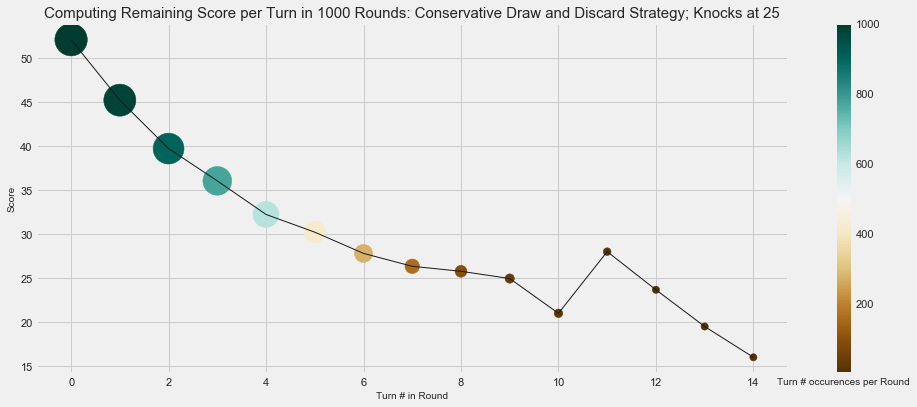

In [170]:
plt.style.use('fivethirtyeight')
cm = plt.cm.get_cmap('BrBG')
sc = plt.scatter(x = p0_turn_grouped['turn'], y = p0_turn_grouped[('player0', 'mean')],
                 c = p0_turn_grouped[('player0', 'count')],
                 s = [50 + count for count in p0_turn_grouped[('player0', 'count')]], cmap = cm)
plt.plot(list(p0_turn_grouped['turn']), list(p0_turn_grouped[('player0', 'mean')]), color = 'k', linewidth = 1)


cbar = plt.colorbar(sc)

cbar.ax.set_xlabel('Turn # occurences per Round', fontsize = 10)
plt.xlabel('Turn # in Round', fontsize = 10)
plt.ylabel('Score', fontsize = 10)
plt.title('Computing Remaining Score per Turn in 1000 Rounds: Conservative Draw and Discard Strategy; Knocks at 25',
          fontsize = 15)

plt.savefig('ScorePerTurnPer1000Rounds.png')
# sns.set(rc={'figure.figsize':(15,6)})
# sns.scatterplot(x = 'turn', y = ('player0', 'mean'), data = p0_turn_grouped, size = ('player0', 'count'))

In [115]:
p0_turn_grouped.columns.values

array([('turn', ''), ('player0', 'mean'), ('player0', 'std'),
       ('player0', 'min'), ('player0', 'max'), ('player0', 'count')],
      dtype=object)

In [91]:
Card

gameLogic.Card

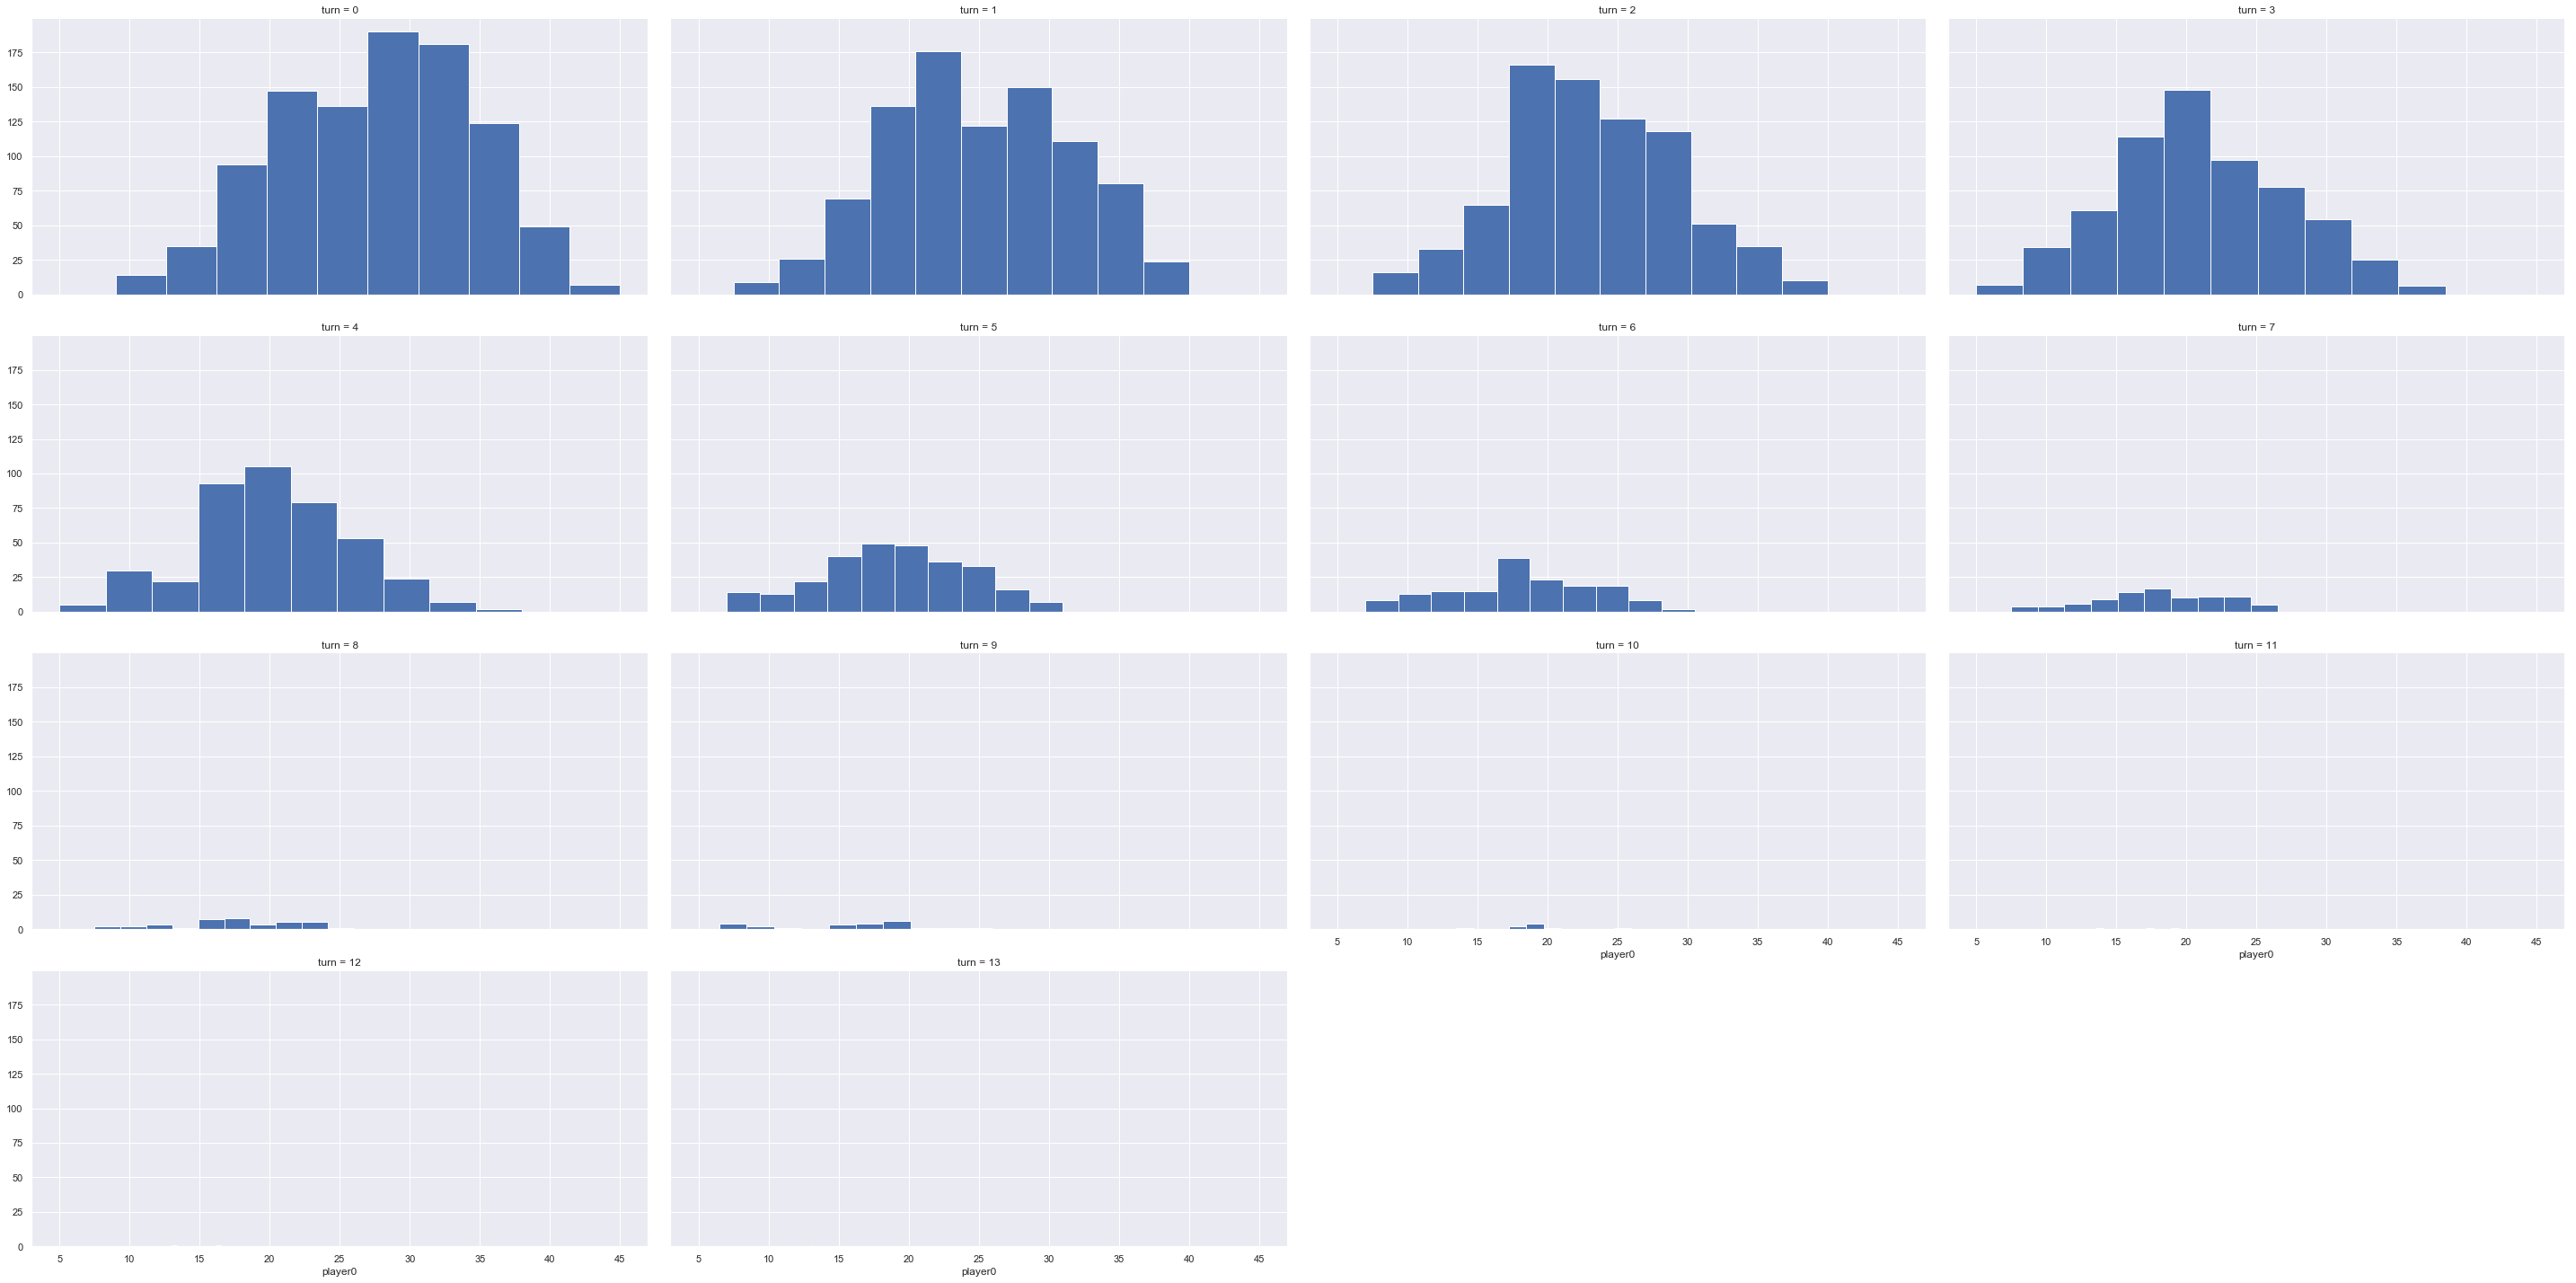

In [88]:
# sns.set(rc={'figure.figsize':(10,25)})

g = sns.FacetGrid(p0_turn, col="turn", aspect = 20/10,  col_wrap=4, height = 5)
g = g.map(plt.hist, "player0", color="b")

g.set_xticklabels(np.arange(0, 60, 5))
g.savefig('turn_scores.png')

In [47]:
summ = 0
for j in turn_score_test['player0']:
    
    summ += len(j)

summ

4306

In [31]:
[a for a in turn_score_test['player0'][0:4]]

[[42, 35, 27, 26, 25, 23], [67, 59, 53, 53, 47, 24], [19], [11]]

In [26]:
rounds[0:500]
len(rounds)
turn[0:500]
len(turn)
score_p0[0:5]
len(score_p0)

4306000

In [48]:
# start_frame = pd.DataFrame({'round': rounds, 'turn': turn, 'score_p0': score_p0})
# start_frame.head(50)

In [ ]:
turns = []
scores1 = []
scores2 = []

for s in turn_dict['player1']:
    for j, score in enumerate(s):
        
        turns.append(j)
        scores.append(score)
        
print(turns)
print(scores)